# Analyzation and Visualization of Covid Data in Python

## Data Source

The data is downloaded from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide). Upload the data to an S3 bucket, and import the necessary python libraries.

In [18]:
%matplotlib inline
import pandas 

## Import Data from S3 Bucket

In [47]:
df= pandas.read_excel('s3://ia241-spring2022-zarazinski/COVID-19-geographic-disbtribution-worldwide.xls')
df[:10] #top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## Top countries with the highest cases

<AxesSubplot:xlabel='countriesAndTerritories'>

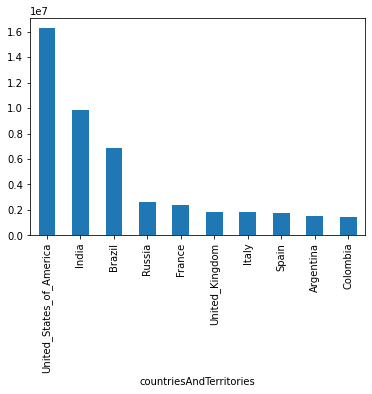

In [32]:
sum_cases_by_country = df.groupby('countriesAndTerritories').sum()['cases']
sum_cases_by_country.nlargest(10).plot.bar() #Displaying countires with highest number of cases in a bar graph

From the data above, it can be concluded that the United States, India, and Brazil were the countries with the highest number of covid cases. something that can be drawn from this is that there must be some management issue for the United States, India, and Brazil when handeling the pandemic that could have casued the drastic increase in cases compared to the rest of the countries displayed.

## Number of cases and deaths per month

<AxesSubplot:xlabel='month'>

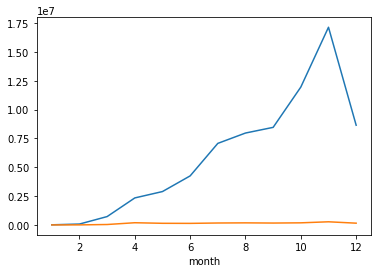

In [33]:
sum_cases_by_date = df.groupby('month').sum()['cases']

sum_deaths_by_date = df.groupby('month').sum()['deaths'] 

sum_cases_by_date.plot() #Displaying months with highest number of cases in a bar graph in blue
sum_deaths_by_date.plot()#Displaying months with highest number of deaths in a line graph in yellow

This visualization shows the total number of cases in blue and deaths in yellow per month. From the above data, while cases dramatically increased between month 10-12, there is only the slightest increase in deaths. This means that while cases might have increased it did not mean a proportional increase in deaths as a result.

## The List of the Unique Countries and Territories

In [46]:
pandas.unique(df['countriesAndTerritories']) #list of countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## USA Data

In [41]:
usa_data= df.loc[df['countriesAndTerritories']=='United_States_of_America']
usa_data[:10]  #Defining data by Country USA using the top 10 for simplification purposes

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
59001,2020-12-14,14,12,2020,189723,1340,United_States_of_America,US,USA,329064917.0,America,873.211592
59002,2020-12-13,13,12,2020,216017,2315,United_States_of_America,US,USA,329064917.0,America,857.089241
59003,2020-12-12,12,12,2020,234633,3343,United_States_of_America,US,USA,329064917.0,America,838.514183
59004,2020-12-11,11,12,2020,224680,2748,United_States_of_America,US,USA,329064917.0,America,830.394205
59005,2020-12-10,10,12,2020,220025,3124,United_States_of_America,US,USA,329064917.0,America,794.356027
59006,2020-12-09,9,12,2020,217344,2564,United_States_of_America,US,USA,329064917.0,America,784.195114
59007,2020-12-08,8,12,2020,197334,1433,United_States_of_America,US,USA,329064917.0,America,769.896719
59008,2020-12-07,7,12,2020,173432,1111,United_States_of_America,US,USA,329064917.0,America,762.794473
59009,2020-12-06,6,12,2020,211933,2203,United_States_of_America,US,USA,329064917.0,America,757.944062
59010,2020-12-05,5,12,2020,231930,2680,United_States_of_America,US,USA,329064917.0,America,746.870564


## China Data

In [36]:
china_data= df.loc[df['countriesAndTerritories']=='China']
china_data[:10]  #Defining data by Country China using the top 10 for simplification purposes

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
12098,2020-12-14,14,12,2020,12,0,China,CN,CHN,1.433784e+09,Asia,0.014437
12099,2020-12-13,13,12,2020,24,0,China,CN,CHN,1.433784e+09,Asia,0.014856
12100,2020-12-12,12,12,2020,13,0,China,CN,CHN,1.433784e+09,Asia,0.013600
12101,2020-12-11,11,12,2020,15,0,China,CN,CHN,1.433784e+09,Asia,0.013112
12102,2020-12-10,10,12,2020,12,0,China,CN,CHN,1.433784e+09,Asia,0.012415
12103,2020-12-09,9,12,2020,15,0,China,CN,CHN,1.433784e+09,Asia,0.013042
12104,2020-12-08,8,12,2020,12,0,China,CN,CHN,1.433784e+09,Asia,0.012345
12105,2020-12-07,7,12,2020,15,0,China,CN,CHN,1.433784e+09,Asia,0.013042
12106,2020-12-06,6,12,2020,18,0,China,CN,CHN,1.433784e+09,Asia,0.012763
12107,2020-12-05,5,12,2020,17,0,China,CN,CHN,1.433784e+09,Asia,0.012624


## Number of Deaths in China compared to the United States

<AxesSubplot:xlabel='dateRep'>

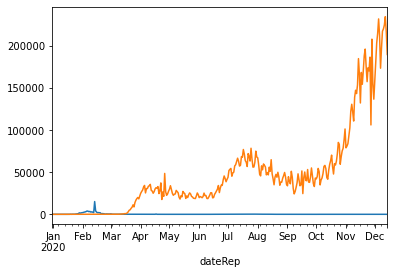

In [44]:
usa_cases_over_time = usa_data.groupby('dateRep').sum()['cases'] #select data from usa of number of deaths
china_cases_over_time = china_data.groupby('dateRep').sum()['cases'] #select data from china of number of deaths
china_cases_over_time.plot() #Plotting number of deaths in china over time using a line graph
usa_cases_over_time.plot() #Plotting number of deaths in usa over time using a line graph

This visualization shows the number of deaths over time in the United States in blue and the number of deaths over time in China in yellow. From the above data, one can conclude that China was most likely drastically under reporting their Covid-19 deaths data. One can see that even as the USA data peaks, China's deaths data remains unchanged throughout the remaining time period after its initial spike.

## Conclusion

To conclude, the United States, India, and Brazil were the countries with the highest Covid-19 cases. Those three countries had a dramatically increased number of cases compared to the remaining countries listed, and it is likely that they will remain the countries with the highest case load. It also showed that while cases may increase it does not necessarily lead to a dramatic increase in deaths as a result. Lastly, when comparing death count from the United States and China, it shows that China is likely vastly underreporting their deaths from Covid-19 as even though the United States deaths jumped many times, China's death count remained all but unchanged throughout the entire data record. A limitation of this project is that it is only limited to one data set for the entire project, as no other outside information was used. Additionally, it is unknown how up to date the information uses it, as it only lists data until December 2020. A suggestion is to use more recent data for this project and more visualizations with updated Covid-19 data.